#**Mall Customer Segmentation by different Clustering Techniques**




>  *Importing all basic libraries*

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, complete, average
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AffinityPropagation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS

> *Data Loading*

In [58]:
mall = pd.read_csv('Mall_Customers.csv')
X = mall.iloc[:, [3, 4]].values
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


> *Check if there are null values in the data*

In [23]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In this case, as we can see that there are no null values. This makes the task of analyzing the data easier.

In [24]:
mall_clust = mall[['Annual Income (k$)', 'Spending Score (1-100)']]

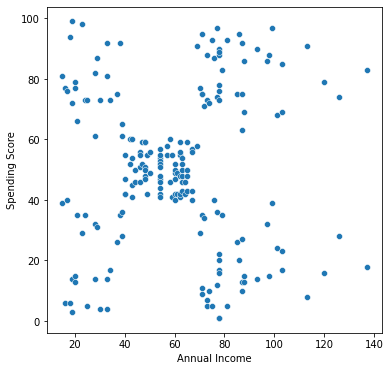

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_clust)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# K MEANS 

> *Elbow Method*

In [26]:
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters = k).fit(mall_clust) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(mall_clust, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/mall_clust.shape[0] for d in dist] 

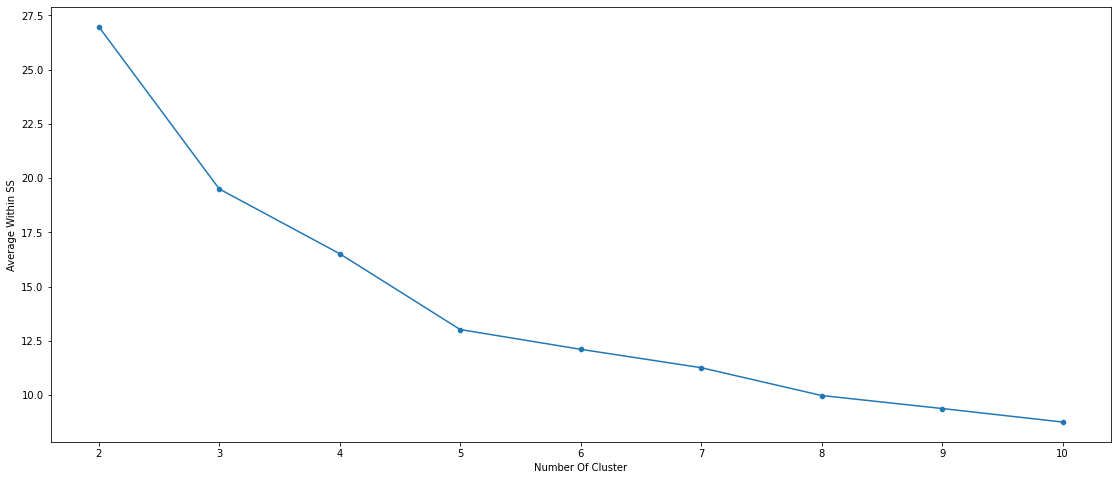

In [27]:
plt.figure(figsize=(19,8))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

From the above figure, the best n_clusters is 5. 
The best n_clusters will be further checked with the Silhouette Method.

> *Silhouette Method*

In [28]:
s_score = []

number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mall_clust)
    labels = kmeans.labels_
    s_score.append(silhouette_score(mall_clust, labels, metric = 'euclidean'))
    
s_score

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5367558067779578,
 0.5288104473798049,
 0.45697007065559897,
 0.45961108421097097,
 0.44760979994374317]

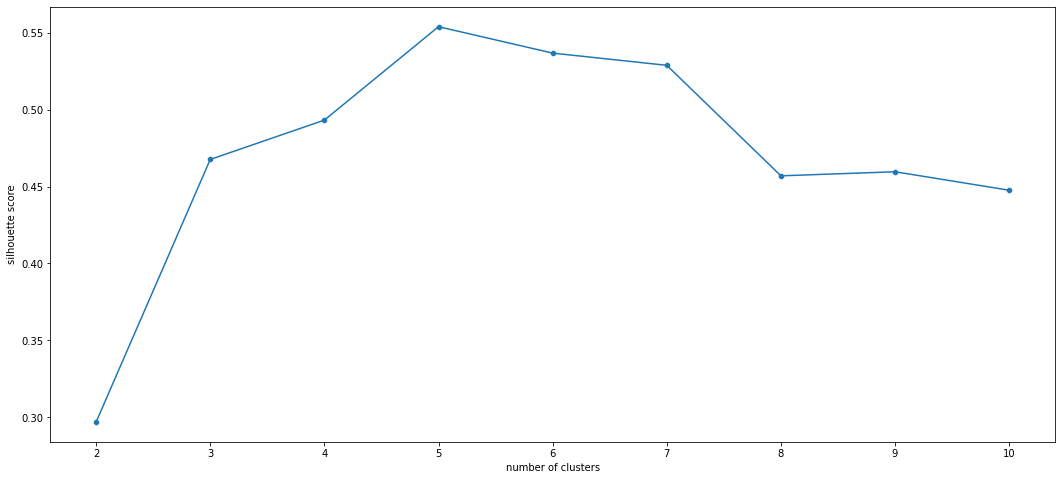

In [29]:
plt.figure(figsize=(18,8))
sns.lineplot(number_of_cluster, s_score)
sns.scatterplot(number_of_cluster, s_score)
plt.xticks(number_of_cluster)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

From the above silhouette score and plot, the best number of cluster is also 5.

In [30]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(mall_clust)
data_mall = mall_clust.copy()
data_mall['cluster'] = kmeans.labels_

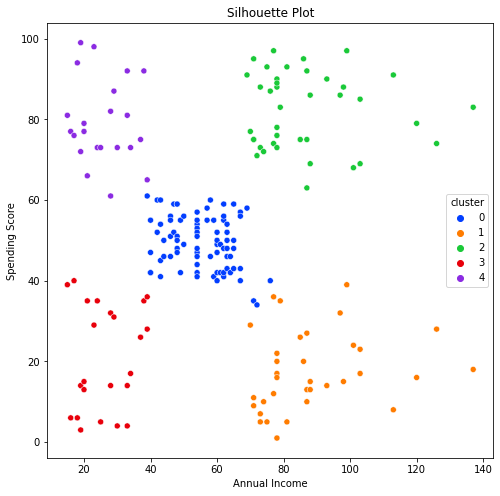

In [31]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data_mall, hue = 'cluster', palette = 'bright')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Silhouette Plot')
plt.show()

# Agglomerative Clustering

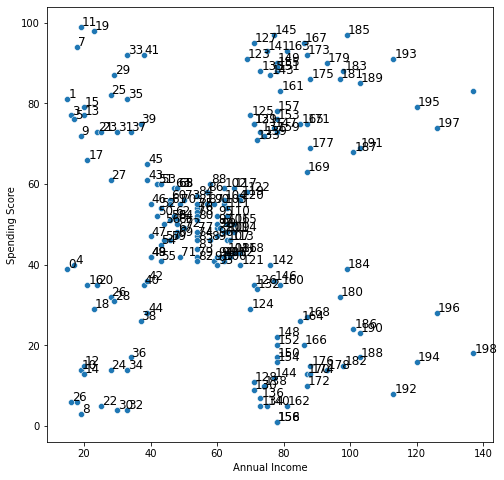

In [36]:
plt.figure(figsize=(8,8))

sns.scatterplot(
    x= 'Annual Income (k$)',
    y= 'Spending Score (1-100)',
    data= mall_clust
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

for i,txt in enumerate(range(0, mall_clust.shape[0]-1)):
    plt.annotate(txt,(mall['Annual Income (k$)'][i]+0.3, mall['Spending Score (1-100)'][i]+0.3), fontsize=12)

> *Dendrogram*

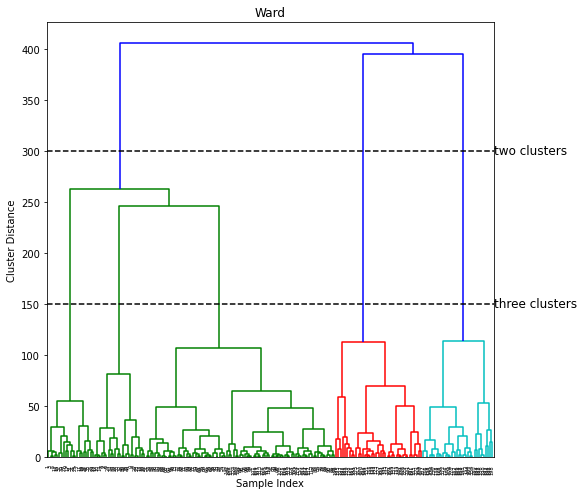

In [37]:
linkage_array = ward(mall_clust)
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [300,300], '--', c = 'k')
ax.plot(bounds, [150,150], '--', c = 'k')

ax.text(bounds[1], 300, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 150, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Ward')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

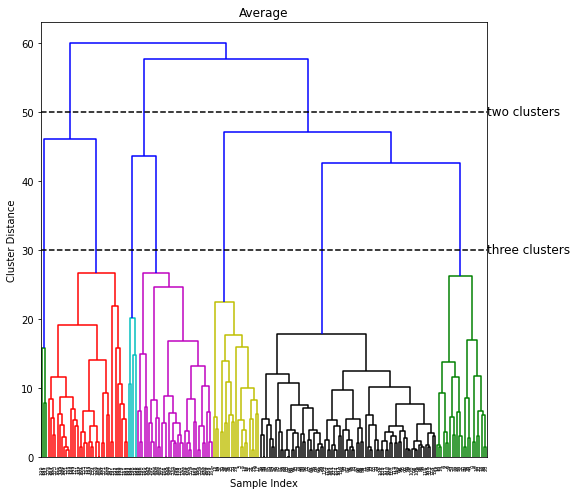

In [38]:
linkage_array = average(mall_clust)
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [50,50], '--', c = 'k')
ax.plot(bounds, [30,30], '--', c = 'k')

ax.text(bounds[1], 50, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 30, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Average')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

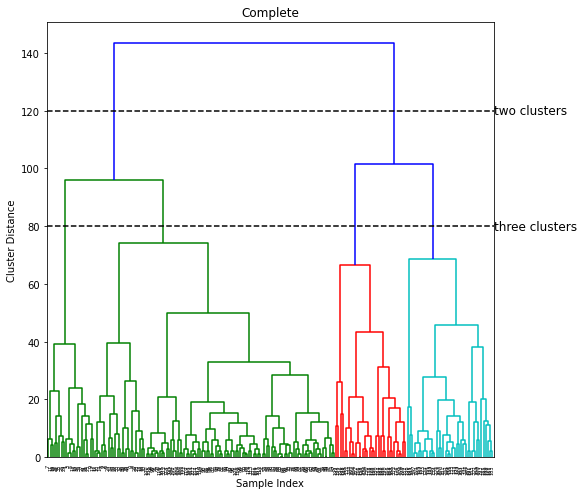

In [39]:
linkage_array = complete(mall_clust)
plt.figure(figsize = (8,8))
dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [120,120], '--', c = 'k')
ax.plot(bounds, [80,80], '--', c = 'k')

ax.text(bounds[1], 120, 'two clusters', va = 'center', fontdict = {'size': 12})
ax.text(bounds[1], 80, 'three clusters', va = 'center', fontdict = {'size': 12})

plt.title('Complete')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

> *Comparison of Results



In [40]:
agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
mall['ward'] = agg_ward.fit_predict(mall_clust)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
mall['average'] = agg_ward.fit_predict(mall_clust)

agg_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
mall['complete'] = agg_ward.fit_predict(mall_clust)

mall.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),ward,average,complete
0,1,Male,19,15,39,4,1,4
1,2,Male,21,15,81,3,3,3
2,3,Female,20,16,6,4,1,4


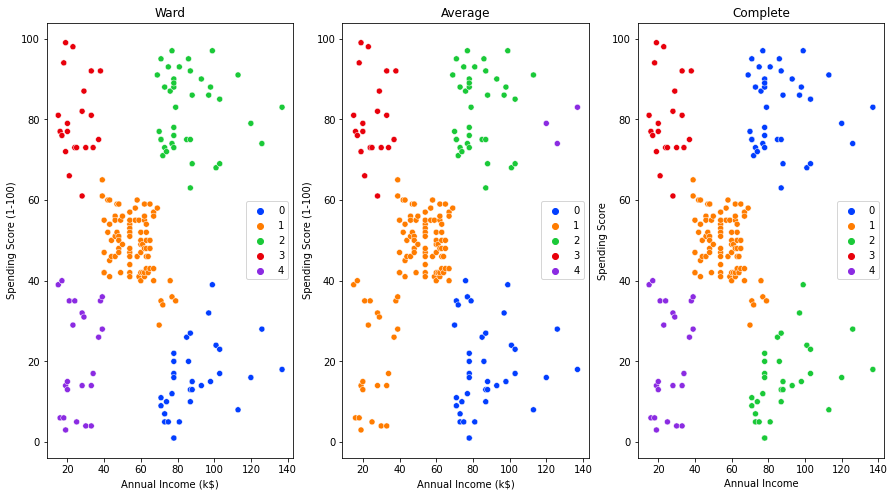

In [42]:
plt.figure(figsize = (15,8))
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall, hue = 'ward', palette = 'bright')
plt.legend(loc = 5)
plt.title('Ward')
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall, hue = 'average', palette = 'bright')
plt.legend(loc = 5)
plt.title('Average')
plt.subplot(1, 3, 3)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall, hue = 'complete', palette = 'bright')
plt.legend(loc = 5)
plt.title('Complete')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [44]:
cluster_name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple']
ward_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
avg_list = ['High Income VS Low Spending', 'Medium Income VS Medium Spending', 'High Income  VS High Spending',
            'Low Income VS High Spending', 'Highest Income VS Highest Spending']
comp_list = ['High Income VS High Spending', 'Medium Income VS Medium Spending', 'High Income  VS Low Spending',
             'Low Income VS High Spending', 'Low Income VS Low Spending']
summary = pd.DataFrame({'Color': color, 'Name': cluster_name, 'Ward': ward_list,
                        'Average': avg_list, 'Complete': comp_list})
summary

,Color,Name,Ward,Average,Complete
0,Blue,Cluster 0,High Income VS Low Spending,High Income VS Low Spending,High Income VS High Spending
1,Orange,Cluster 1,Medium Income VS Medium Spending,Medium Income VS Medium Spending,Medium Income VS Medium Spending
2,Green,Cluster 2,High Income VS High Spending,High Income VS High Spending,High Income VS Low Spending
3,Red,Cluster 3,Low Income VS High Spending,Low Income VS High Spending,Low Income VS High Spending
4,Purple,Cluster 4,Low Income VS Low Spending,Highest Income VS Highest Spending,Low Income VS Low Spending


# DBSCAN

> *Initial Clustering*


In [45]:
scaler = StandardScaler()
mall_clust_scaled = scaler.fit_transform(mall_clust)
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
cluster = dbscan.fit_predict(mall_clust_scaled)

silhouette_score(mall_clust_scaled, cluster)

0.0965528913348881

> *Optimizing Minimum Sample And Epsilon*

In [46]:
for eps in [i/10 for i in range(2,6)]:
    for min_samples in range (6,10):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(mall_clust_scaled)
        score = silhouette_score(mall_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 6
clusters present: [-1  0  1  2  3]
clusters sizes: [95 78 10  9  8]
Silhouette Score: 0.09644483815713827

eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [100  78   8   7   7]
Silhouette Score: 0.05559332249286136

eps 0.2
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [116  76   8]
Silhouette Score: 0.04120506369450064

eps 0.2
\min samples 9
clusters present: [-1  0]
clusters sizes: [128  72]
Silhouette Score: 0.10238770147236753

eps 0.3
\min samples 6
clusters present: [-1  0  1  2  3  4  5]
clusters sizes: [48 10  6 87 26 14  9]
Silhouette Score: 0.24983531622925184

eps 0.3
\min samples 7
clusters present: [-1  0  1  2  3]
clusters sizes: [72 10 82 24 12]
Silhouette Score: 0.23146493255355374

eps 0.3
\min samples 8
clusters present: [-1  0  1  2  3  4]
clusters sizes: [72 10 82 12 12 12]
Silhouette Score: 0.19432071085905328

eps 0.3
\min samples 9
clusters present: [-1  0  1  2  3]
clusters sizes: [86 82 12 10 10]


The best hyperparam are eps: 0.4 and min samples: 8, because it has the highest silhouette score, but samples is inlcuded with noise.

> *Final Result DBSCAN*


In [47]:
dbscan = DBSCAN(eps = 0.4, min_samples = 8)
labels = dbscan.fit_predict(mall_clust_scaled)
mall_clust['cluster'] = labels

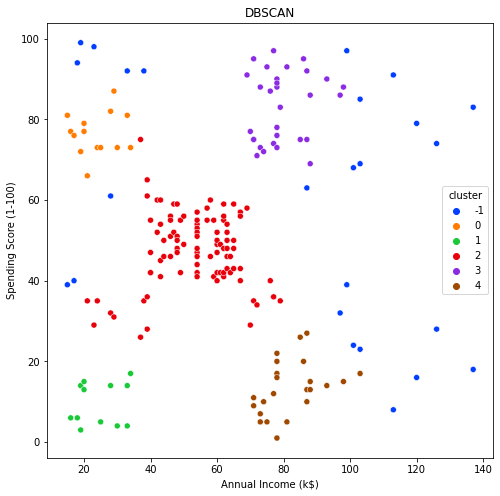

In [49]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_clust, hue = 'cluster', palette = 'bright')
plt.title('DBSCAN')
plt.show()

In [50]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
color = ['Blue', 'Orange', 'Green', 'Red', 'Purple', 'Brown']
vs_list = ['Noise', 'Low Income VS High Spending', 'Lowest Income  VS Lowest Spending',
           'Medium Income VS Medium Spending', 'High Income VS Highest Spending',
           'High Income VS Low Spending']
dbscan_summary = pd.DataFrame({
    'Color': color,
    'Cluster DBSCAN': cluster_name,
    'Annual Income VS Spending Score': vs_list
})
dbscan_summary

,Color,Cluster DBSCAN,Annual Income VS Spending Score
0,Blue,Cluster -1,Noise
1,Orange,Cluster 0,Low Income VS High Spending
2,Green,Cluster 1,Lowest Income VS Lowest Spending
3,Red,Cluster 2,Medium Income VS Medium Spending
4,Purple,Cluster 3,High Income VS Highest Spending
5,Brown,Cluster 4,High Income VS Low Spending


# Affinity Propagation

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Affinity Propagation Model')

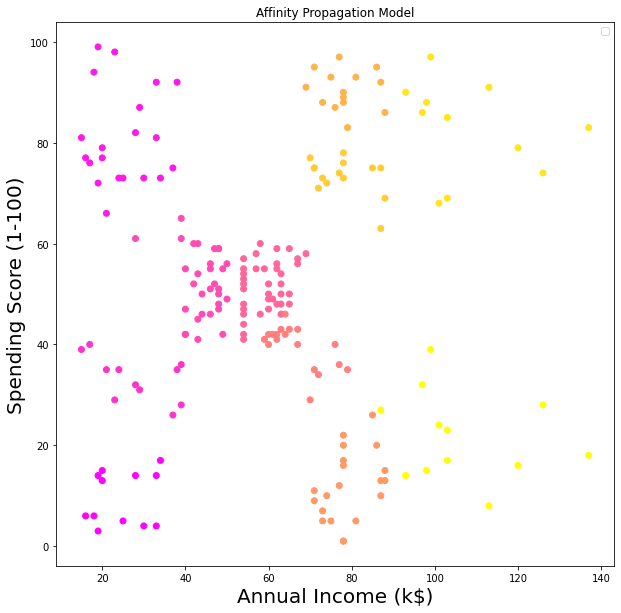

In [59]:
ap = AffinityPropagation()

ap.fit(X)
ap_y_pred = ap.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ap_y_pred, cmap='spring')
plt.title("Affinity Propagation Model")

# Mean Shift

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MeanShift Model')

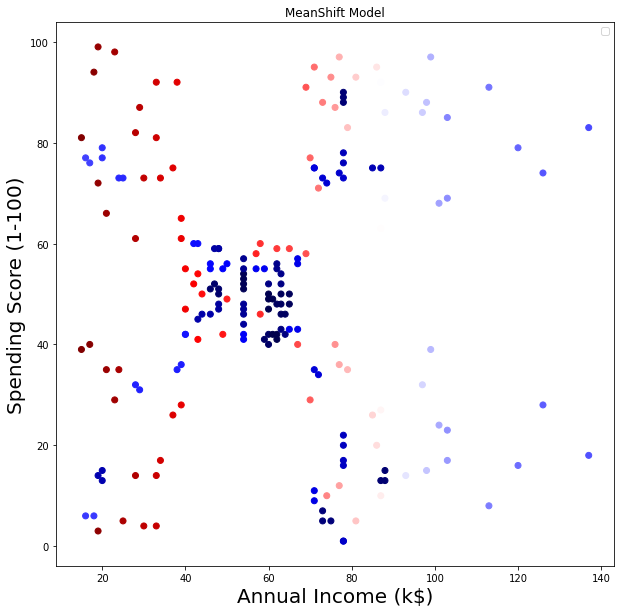

In [60]:
ms = MeanShift(bandwidth=2)
ms.fit(X)
ms_y_pred = ms.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=ms_y_pred, cmap='seismic')
plt.title("MeanShift Model")

# OPTICS

No handles with labels found to put in legend.


Text(0.5, 1.0, 'OPTICS Model')

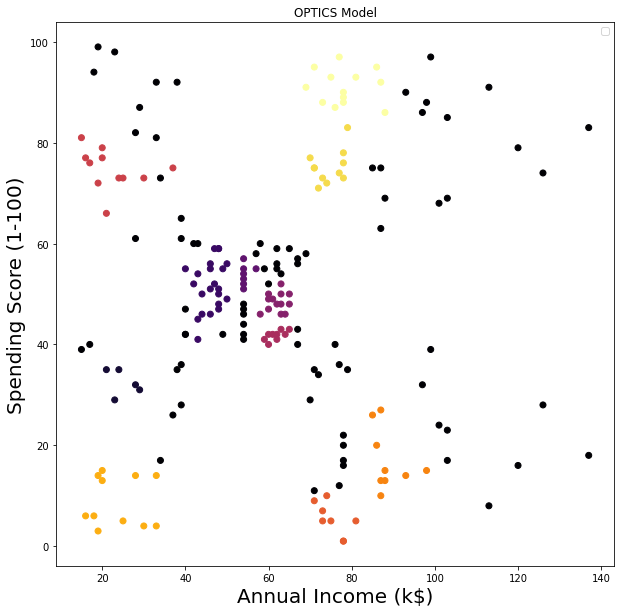

In [61]:
opt = OPTICS(min_samples=5)
opt_y_pred = opt.fit_predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=opt_y_pred, cmap='inferno')
plt.title("OPTICS Model")

# Gaussian Mixture Model

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Gaussian Mixture Model')

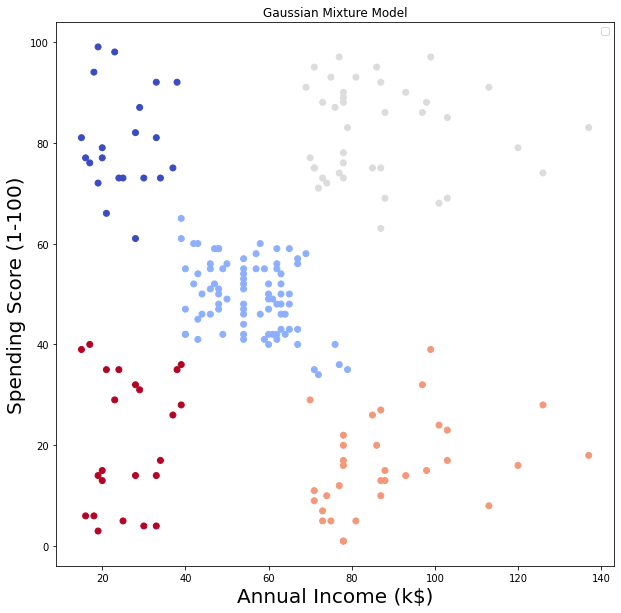

In [62]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X)
gmm_y_pred = gmm.predict(X)
plt.figure(figsize=(10,10))
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.scatter(X[:,0], X[:,1],c=gmm_y_pred, cmap='coolwarm')
plt.title("Gaussian Mixture Model")